In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [20]:
df_county_pop = pd.read_csv('./cc-est2021-agesex-all.csv',encoding='latin-1')
df_county_pop = df_county_pop[df_county_pop['YEAR']==1]
df_county_pop = df_county_pop[['STATE','COUNTY','POPESTIMATE']]
df_county_pop['STATE'] = df_county_pop['STATE'].astype(str).apply(lambda x: x if len(x)==2 else '0'+x)
df_county_pop['COUNTY'] = df_county_pop['COUNTY'].astype(str).apply(lambda x: x if len(x)>2 else '0'+x)
df_county_pop['COUNTY'] = df_county_pop['COUNTY'].astype(str).apply(lambda x: x if len(x)==3 else '0'+x)
df_county_pop['FIPS'] = df_county_pop['STATE']+df_county_pop['COUNTY']
df_county_pop = df_county_pop[['FIPS','POPESTIMATE']]
df_county_pop.columns = ['FIPS', 'pop']

df_area = pd.read_csv('2020_Gaz_counties_national.txt', delimiter='\t')
df_area = df_area[['GEOID', 'ALAND_SQMI']]
df_area['GEOID'] = df_area['GEOID'].astype(str).apply(lambda x: x if len(x)==5 else '0'+x)
df_area.columns = ['FIPS','area_sqmi']

df_county = df_area.merge(df_county_pop, on='FIPS', how='inner')
df_county['pop_density'] = df_county['pop'] / df_county['area_sqmi']
del df_area, df_county_pop

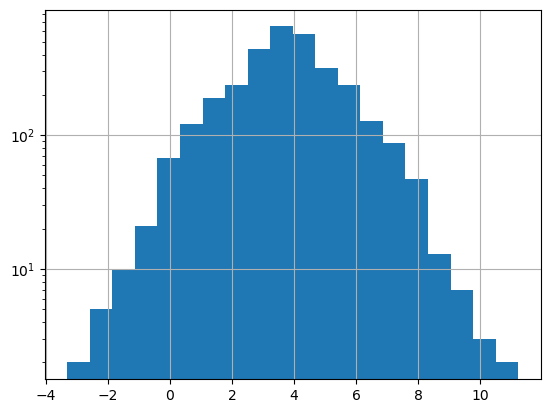

In [28]:
df_county['pop_density'].apply(lambda x: math.log(x)).hist(bins=20)
plt.yscale('log')

## $R_0$ Values

This study is not aimed at estimating $R_0$, but rather, interaction given $R_0$. This will be used to compare to facets like occupation distributions and family distributions. With this in mind, we are using estimates reported in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7751056/#:~:text=R0%20of%20COVID%2D19,-R0%20of&text=The%20review%20by%20Liu%20et,an%20interquartile%20range%20of%201.16.

Given that varying estimates put the quantity in the neighborhood of 2.5 to 3.5, we will use $R_0=3$ initially, and monitor results for fluctations in $R_0$ computationally. 

## Delays

There is time-lag between being exposed to COVID-19 and experiencing symptoms, and between being exposed and death. These need to be accounted for, but as of yet this model does not use literature provided quantities for these values. 

Instead, we use the following:
1. Lag from exposure to symptoms & testing: 7 days
1. Lag from exposure to death: 35 days

## Corrections

1. Cases need to be corrected for test positivity rates.  
1. Population density needs to be corrected daily for deaths. 
1. Others?


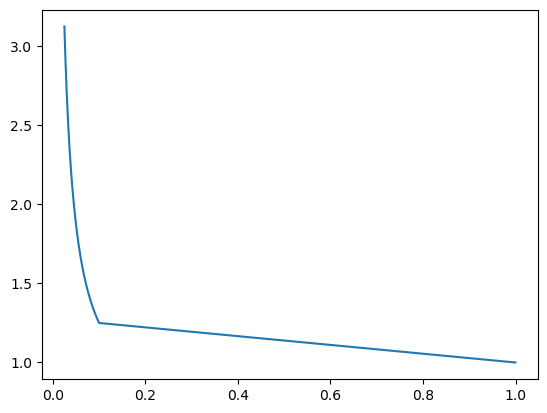

In [66]:
def test_positivity_correction(rates, v):
    def above(x):
        y = 1+(1-((x-v)/(1-v)))/4
        return y
    def below(x):
        y = (1+(v/x)) / (2/(1+(1/4)))
        return y
    adj_rates = [above(i) if i >= 0.1 else below(i) for i in rates]
    return adj_rates

test_array = [i/2000 for i in range(50,2000)]
adj_array = test_positivity_correction(test_array, 0.1)
plt.plot(test_array, adj_array)

In [67]:
50/2000

0.025